In [2]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

DROPOUT ANALYSIS AND VISUALISATION

In [3]:


# Loading the dataset
india = gpd.read_file("Indian_States.txt")
df = pd.read_csv("dropout-ratio-2012-2015.csv")

# Exploring the dataset
print(df.head())
print(df.info())
print(df.describe())

# Checking for missing values
print(df.isnull().sum())

#using np.nan
df.replace("NR", np.nan, inplace=True)


# Renaming the columns
df.rename(columns={"Primary_Total": "Primary", "Upper Primary_Total": "Upper_Primary", "Secondary _Total": "Secondary", "HrSecondary_Total": "HrSecondary"}, inplace=True)

# Converting the object datatype to float
df["Primary"] = df["Primary"].astype(float)
df["Upper_Primary"] = df["Upper_Primary"].astype(float)
df["Secondary"] = df["Secondary"].astype(float)
df["HrSecondary"] = df["HrSecondary"].astype(float)

# Checking for missing values
print(df.isnull().sum())

         State_UT     year Primary_Boys Primary_Girls Primary_Total  \
0   A & N Islands  2012-13         0.83          0.51          0.68   
1   A & N Islands  2013-14         1.35          1.06          1.21   
2   A & N Islands  2014-15         0.47          0.55          0.51   
3  Andhra Pradesh  2012-13          3.3          3.05          3.18   
4  Andhra Pradesh  2013-14         4.31          4.39          4.35   

  Upper Primary_Boys Upper Primary_Girls Upper Primary_Total Secondary _Boys  \
0     Uppe_r_Primary                1.09                1.23            5.57   
1                 NR                1.54                0.51            8.36   
2               1.44                1.95                1.69           11.47   
3               3.21                3.51                3.36           12.21   
4               3.46                4.12                3.78           11.95   

  Secondary _Girls Secondary _Total HrSecondary_Boys HrSecondary_Girls  \
0             5.55

In [4]:
df.head()

,State_UT,year,Primary_Boys,Primary_Girls,Primary,Upper Primary_Boys,Upper Primary_Girls,Upper_Primary,Secondary _Boys,Secondary _Girls,Secondary,HrSecondary_Boys,HrSecondary_Girls,HrSecondary
0,A & N Islands,2012-13,0.83,0.51,0.68,Uppe_r_Primary,1.09,1.23,5.57,5.55,5.56,17.66,10.15,14.14
1,A & N Islands,2013-14,1.35,1.06,1.21,NaN,1.54,0.51,8.36,5.98,7.20,18.94,12.2,15.87
2,A & N Islands,2014-15,0.47,0.55,0.51,1.44,1.95,1.69,11.47,8.16,9.87,21.05,12.21,16.93
3,Andhra Pradesh,2012-13,3.3,3.05,3.18,3.21,3.51,3.36,12.21,13.25,12.72,2.66,NaN,0.35
4,Andhra Pradesh,2013-14,4.31,4.39,4.35,3.46,4.12,3.78,11.95,13.37,12.65,12.65,10.85,11.79


In [5]:
df_total=df[['Primary','Upper_Primary','Secondary','HrSecondary']]

In [6]:
df_total.head()

,Primary,Upper_Primary,Secondary,HrSecondary
0,0.68,1.23,5.56,14.14
1,1.21,0.51,7.20,15.87
2,0.51,1.69,9.87,16.93
3,3.18,3.36,12.72,0.35
4,4.35,3.78,12.65,11.79


In [7]:
india.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,NL_NAME_1,VARNAME_1,TYPE_1,ENGTYPE_1,filename,filename_1,filename_2,filename_3,filename_4,geometry
0,105,IND,India,1,Andaman and Nicobar,,Andaman & Nicobar Islands|Andaman et Nicobar|I...,Union Territor,Union Territory,,,,,,"MULTIPOLYGON (((93.78773 6.85264, 93.78849 6.8..."
1,105,IND,India,2,Andhra Pradesh,,,State,State,,,,,,"MULTIPOLYGON (((80.27458 13.45958, 80.27458 13..."
2,105,IND,India,3,Arunachal Pradesh,,Agence de la Frontire du Nord-Est(French-obsol...,State,State,,,,,,"POLYGON ((96.15778 29.38310, 96.16380 29.37668..."
3,105,IND,India,4,Assam,,,State,State,,,,,,"MULTIPOLYGON (((89.87145 25.53730, 89.87118 25..."
4,105,IND,India,5,Bihar,,,State,State,,,,,,"MULTIPOLYGON (((88.10548 26.53904, 88.10505 26..."


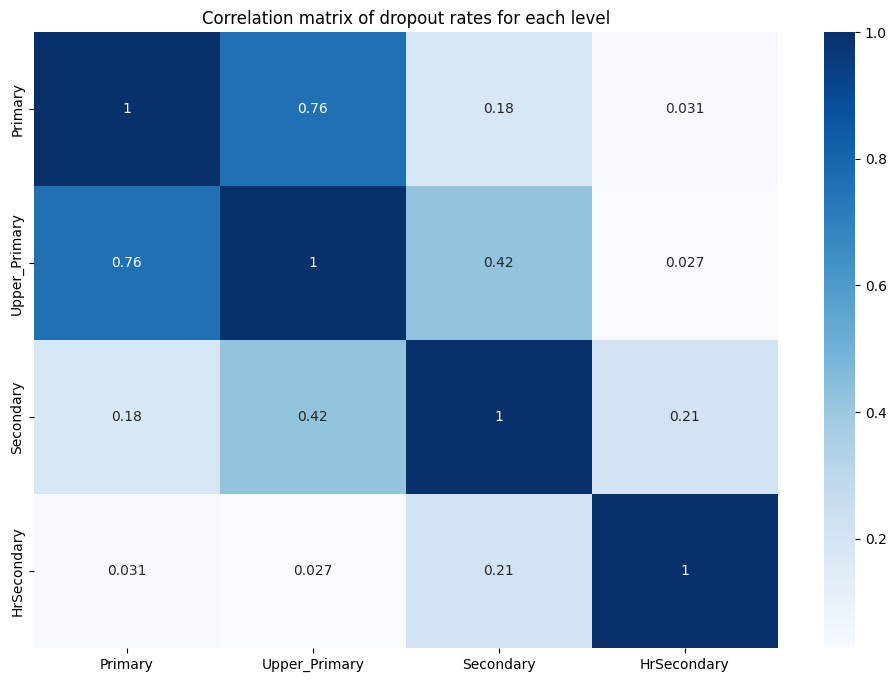

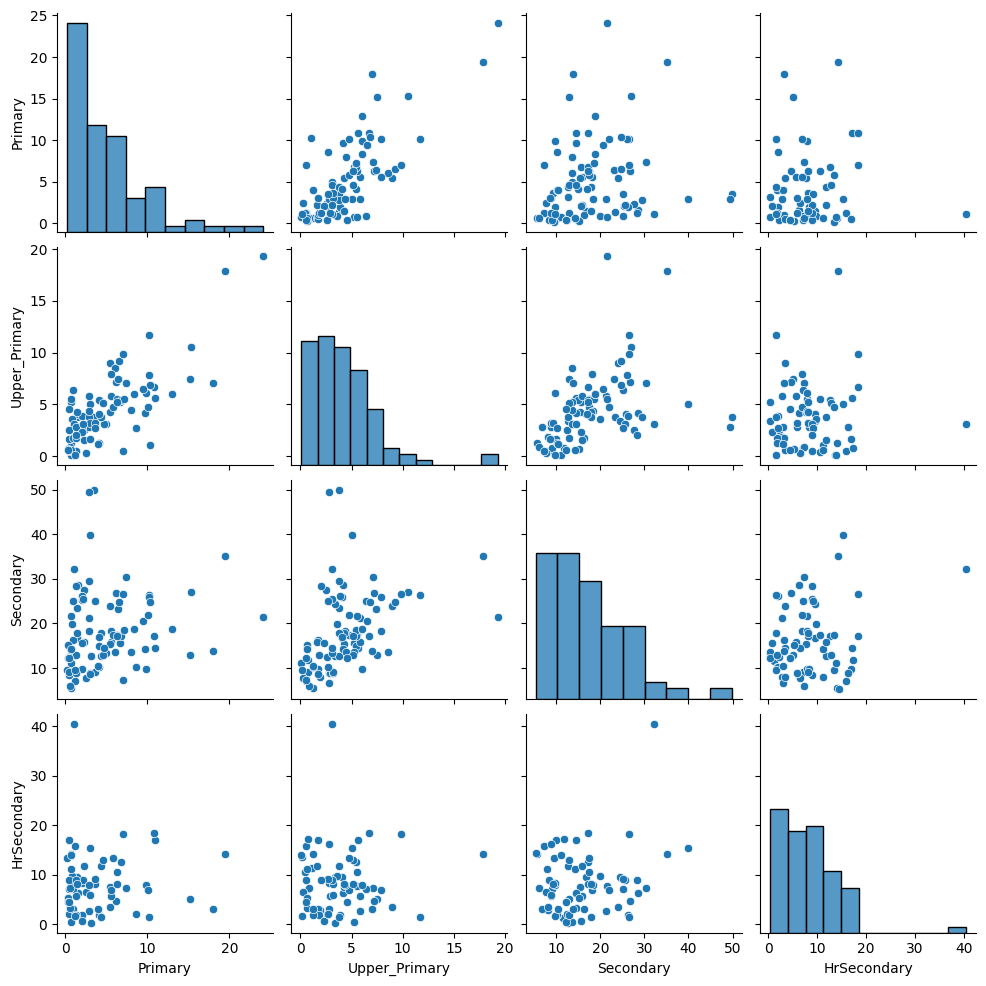

In [8]:
# Plotting the correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(df_total.corr(), annot=True, cmap="Blues",)
plt.title("Correlation matrix of dropout rates for each level")
plt.show()

# Plotting the pairplot
sns.pairplot(df_total)
plt.show()

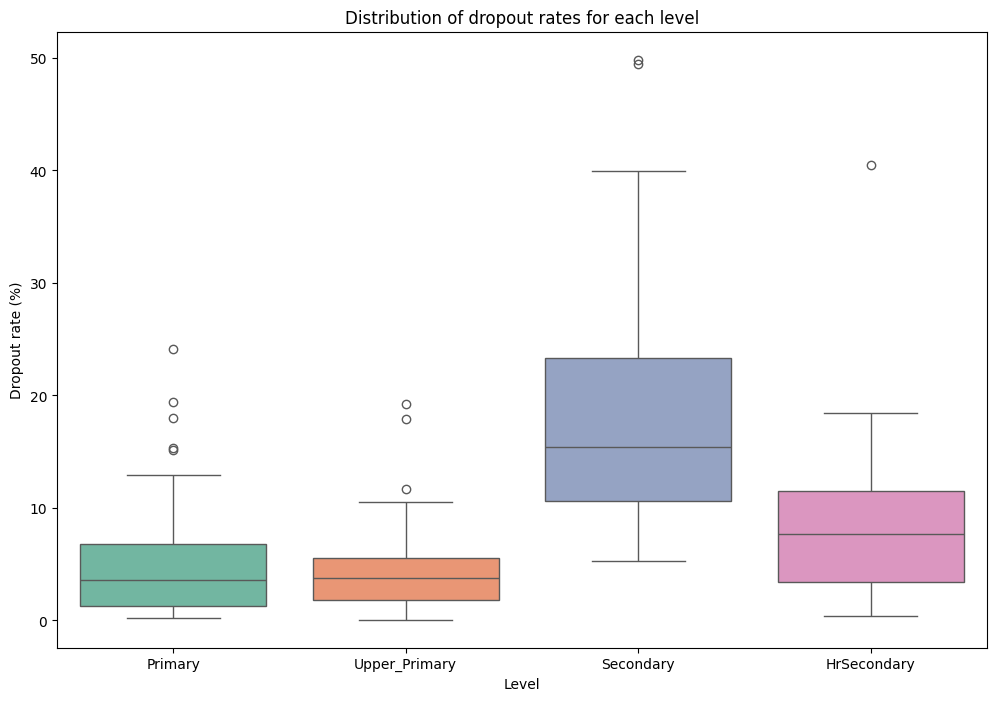

In [9]:
# Plotting the distribution of dropout rates for each level
plt.figure(figsize=(12,8))
sns.boxplot(data=df_total, palette="Set2")
plt.title("Distribution of dropout rates for each level")
plt.xlabel("Level")
plt.ylabel("Dropout rate (%)")
plt.show()

In [10]:
# Adding a new column for the average dropout rate across all levels
df["Average"] = df_total.mean(axis=1)

In [11]:
df.head()

,State_UT,year,Primary_Boys,Primary_Girls,Primary,Upper Primary_Boys,Upper Primary_Girls,Upper_Primary,Secondary _Boys,Secondary _Girls,Secondary,HrSecondary_Boys,HrSecondary_Girls,HrSecondary,Average
0,A & N Islands,2012-13,0.83,0.51,0.68,Uppe_r_Primary,1.09,1.23,5.57,5.55,5.56,17.66,10.15,14.14,5.4025
1,A & N Islands,2013-14,1.35,1.06,1.21,NaN,1.54,0.51,8.36,5.98,7.20,18.94,12.2,15.87,6.1975
2,A & N Islands,2014-15,0.47,0.55,0.51,1.44,1.95,1.69,11.47,8.16,9.87,21.05,12.21,16.93,7.2500
3,Andhra Pradesh,2012-13,3.3,3.05,3.18,3.21,3.51,3.36,12.21,13.25,12.72,2.66,NaN,0.35,4.9025
4,Andhra Pradesh,2013-14,4.31,4.39,4.35,3.46,4.12,3.78,11.95,13.37,12.65,12.65,10.85,11.79,8.1425


In [12]:
# Sort the dataframe by the average dropout rate in ascending order
df_sorted = df.sort_values(by="Average", ascending=True)
# Select the first five rows for the best states
df_best5 = df_sorted.head(5)
# Select the last five rows for the worst states
df_worst5 = df_sorted.tail(5)
# Concatenate the best and worst states into a new dataframe
df_comparison = pd.concat([df_best5, df_worst5])

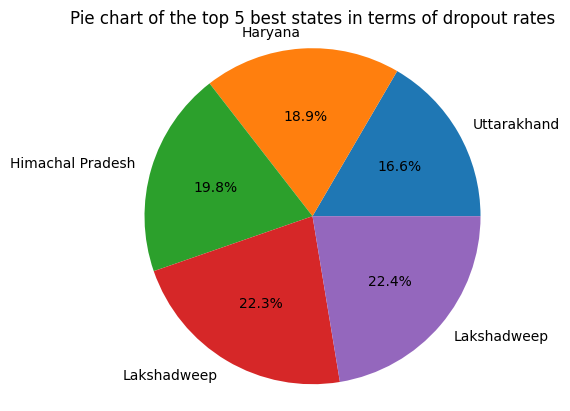

In [13]:
# Extract the data and labels for the pie chart
data = df_best5["Average"]
labels = df_best5["State_UT"]
# Create the pie chart using the plt.pie() function
plt.pie(data, labels=labels, autopct="%1.1f%%")
# Add a title for the pie chart
plt.title("Pie chart of the top 5 best states in terms of dropout rates")
# Adjust the aspect ratio of the plot
plt.axis("equal")
# Show the pie chart on the screen or save it to a file
plt.show()

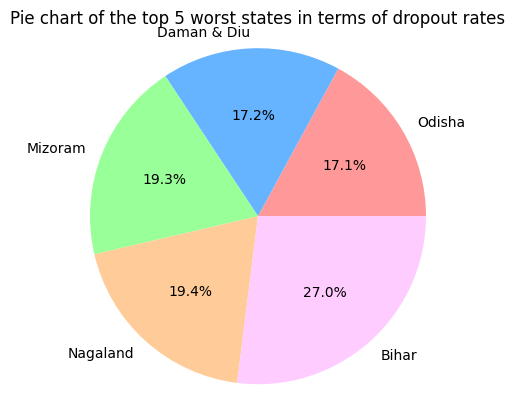

In [14]:
# Extract the data and labels for the pie chart
data = df_worst5["Average"]
labels = df_worst5["State_UT"]
# Create the pie chart using the plt.pie() function
plt.pie(data, labels=labels,autopct="%1.1f%%",colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#ffccff'] )
# Add a title for the pie chart
plt.title("Pie chart of the top 5 worst states in terms of dropout rates")
# Adjust the aspect ratio of the plot
plt.axis("equal")
# Show the pie chart on the screen or save it to a file
plt.show()

In [15]:
df.head()

,State_UT,year,Primary_Boys,Primary_Girls,Primary,Upper Primary_Boys,Upper Primary_Girls,Upper_Primary,Secondary _Boys,Secondary _Girls,Secondary,HrSecondary_Boys,HrSecondary_Girls,HrSecondary,Average
0,A & N Islands,2012-13,0.83,0.51,0.68,Uppe_r_Primary,1.09,1.23,5.57,5.55,5.56,17.66,10.15,14.14,5.4025
1,A & N Islands,2013-14,1.35,1.06,1.21,NaN,1.54,0.51,8.36,5.98,7.20,18.94,12.2,15.87,6.1975
2,A & N Islands,2014-15,0.47,0.55,0.51,1.44,1.95,1.69,11.47,8.16,9.87,21.05,12.21,16.93,7.2500
3,Andhra Pradesh,2012-13,3.3,3.05,3.18,3.21,3.51,3.36,12.21,13.25,12.72,2.66,NaN,0.35,4.9025
4,Andhra Pradesh,2013-14,4.31,4.39,4.35,3.46,4.12,3.78,11.95,13.37,12.65,12.65,10.85,11.79,8.1425


In [16]:
df_boys=df[["Primary_Boys","Upper Primary_Boys","Secondary _Boys","HrSecondary_Boys"]]
df_girls=df[["Primary_Girls","Upper Primary_Girls","Secondary _Girls","HrSecondary_Girls"]]

In [17]:
df_boys = df_boys.apply(pd.to_numeric, errors='coerce')
df_girls=df_girls.apply(pd.to_numeric, errors='coerce')


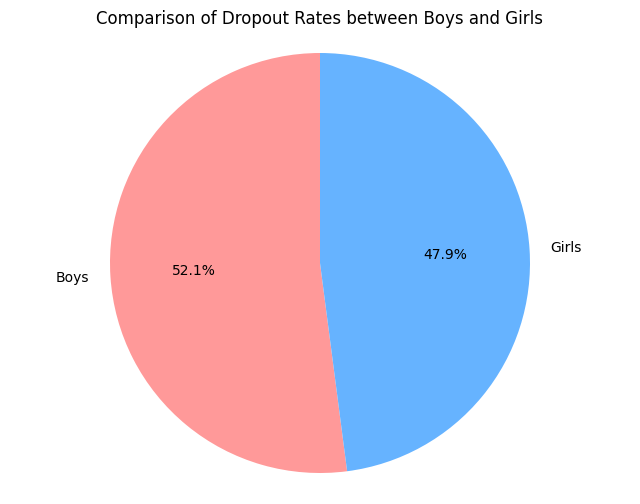

In [18]:
# Calculate the total dropout rates for boys and girls
boys_total = df_boys.sum().sum()
girls_total = df_girls.sum().sum()

# Calculate the percentage of dropout rates for boys and girls
boys_percentage = (boys_total / (boys_total + girls_total)) * 100
girls_percentage = (girls_total / (boys_total + girls_total)) * 100

# Create a pie chart to visualize the comparison
labels = ['Boys', 'Girls']
sizes = [boys_percentage, girls_percentage]
colors = ['#ff9999', '#66b3ff']


plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Comparison of Dropout Rates between Boys and Girls')
plt.show()


In [19]:
# Convert columns to numeric data types
df["year"] = pd.to_numeric(df["year"], errors="coerce")

In [20]:
# Group the dataframe by year and calculate the mean dropout rate for each level
df_grouped = df.groupby("year").mean().reset_index()

In [21]:
df.head()

,State_UT,year,Primary_Boys,Primary_Girls,Primary,Upper Primary_Boys,Upper Primary_Girls,Upper_Primary,Secondary _Boys,Secondary _Girls,Secondary,HrSecondary_Boys,HrSecondary_Girls,HrSecondary,Average
0,A & N Islands,NaN,0.83,0.51,0.68,Uppe_r_Primary,1.09,1.23,5.57,5.55,5.56,17.66,10.15,14.14,5.4025
1,A & N Islands,NaN,1.35,1.06,1.21,NaN,1.54,0.51,8.36,5.98,7.20,18.94,12.2,15.87,6.1975
2,A & N Islands,NaN,0.47,0.55,0.51,1.44,1.95,1.69,11.47,8.16,9.87,21.05,12.21,16.93,7.2500
3,Andhra Pradesh,NaN,3.3,3.05,3.18,3.21,3.51,3.36,12.21,13.25,12.72,2.66,NaN,0.35,4.9025
4,Andhra Pradesh,NaN,4.31,4.39,4.35,3.46,4.12,3.78,11.95,13.37,12.65,12.65,10.85,11.79,8.1425


In [22]:
india.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,NL_NAME_1,VARNAME_1,TYPE_1,ENGTYPE_1,filename,filename_1,filename_2,filename_3,filename_4,geometry
0,105,IND,India,1,Andaman and Nicobar,,Andaman & Nicobar Islands|Andaman et Nicobar|I...,Union Territor,Union Territory,,,,,,"MULTIPOLYGON (((93.78773 6.85264, 93.78849 6.8..."
1,105,IND,India,2,Andhra Pradesh,,,State,State,,,,,,"MULTIPOLYGON (((80.27458 13.45958, 80.27458 13..."
2,105,IND,India,3,Arunachal Pradesh,,Agence de la Frontire du Nord-Est(French-obsol...,State,State,,,,,,"POLYGON ((96.15778 29.38310, 96.16380 29.37668..."
3,105,IND,India,4,Assam,,,State,State,,,,,,"MULTIPOLYGON (((89.87145 25.53730, 89.87118 25..."
4,105,IND,India,5,Bihar,,,State,State,,,,,,"MULTIPOLYGON (((88.10548 26.53904, 88.10505 26..."


In [23]:
# Merge the two DataFrames on the common column that contains the state names
merged = pd.merge(india, df, left_on="NAME_1", right_on="State_UT", how="inner")

In [24]:
df.head()

,State_UT,year,Primary_Boys,Primary_Girls,Primary,Upper Primary_Boys,Upper Primary_Girls,Upper_Primary,Secondary _Boys,Secondary _Girls,Secondary,HrSecondary_Boys,HrSecondary_Girls,HrSecondary,Average
0,A & N Islands,NaN,0.83,0.51,0.68,Uppe_r_Primary,1.09,1.23,5.57,5.55,5.56,17.66,10.15,14.14,5.4025
1,A & N Islands,NaN,1.35,1.06,1.21,NaN,1.54,0.51,8.36,5.98,7.20,18.94,12.2,15.87,6.1975
2,A & N Islands,NaN,0.47,0.55,0.51,1.44,1.95,1.69,11.47,8.16,9.87,21.05,12.21,16.93,7.2500
3,Andhra Pradesh,NaN,3.3,3.05,3.18,3.21,3.51,3.36,12.21,13.25,12.72,2.66,NaN,0.35,4.9025
4,Andhra Pradesh,NaN,4.31,4.39,4.35,3.46,4.12,3.78,11.95,13.37,12.65,12.65,10.85,11.79,8.1425


In [25]:
# Remove Chandigarh from the GeoDataFrame
merged =merged[merged['NAME_1'] != 'Chandigarh']

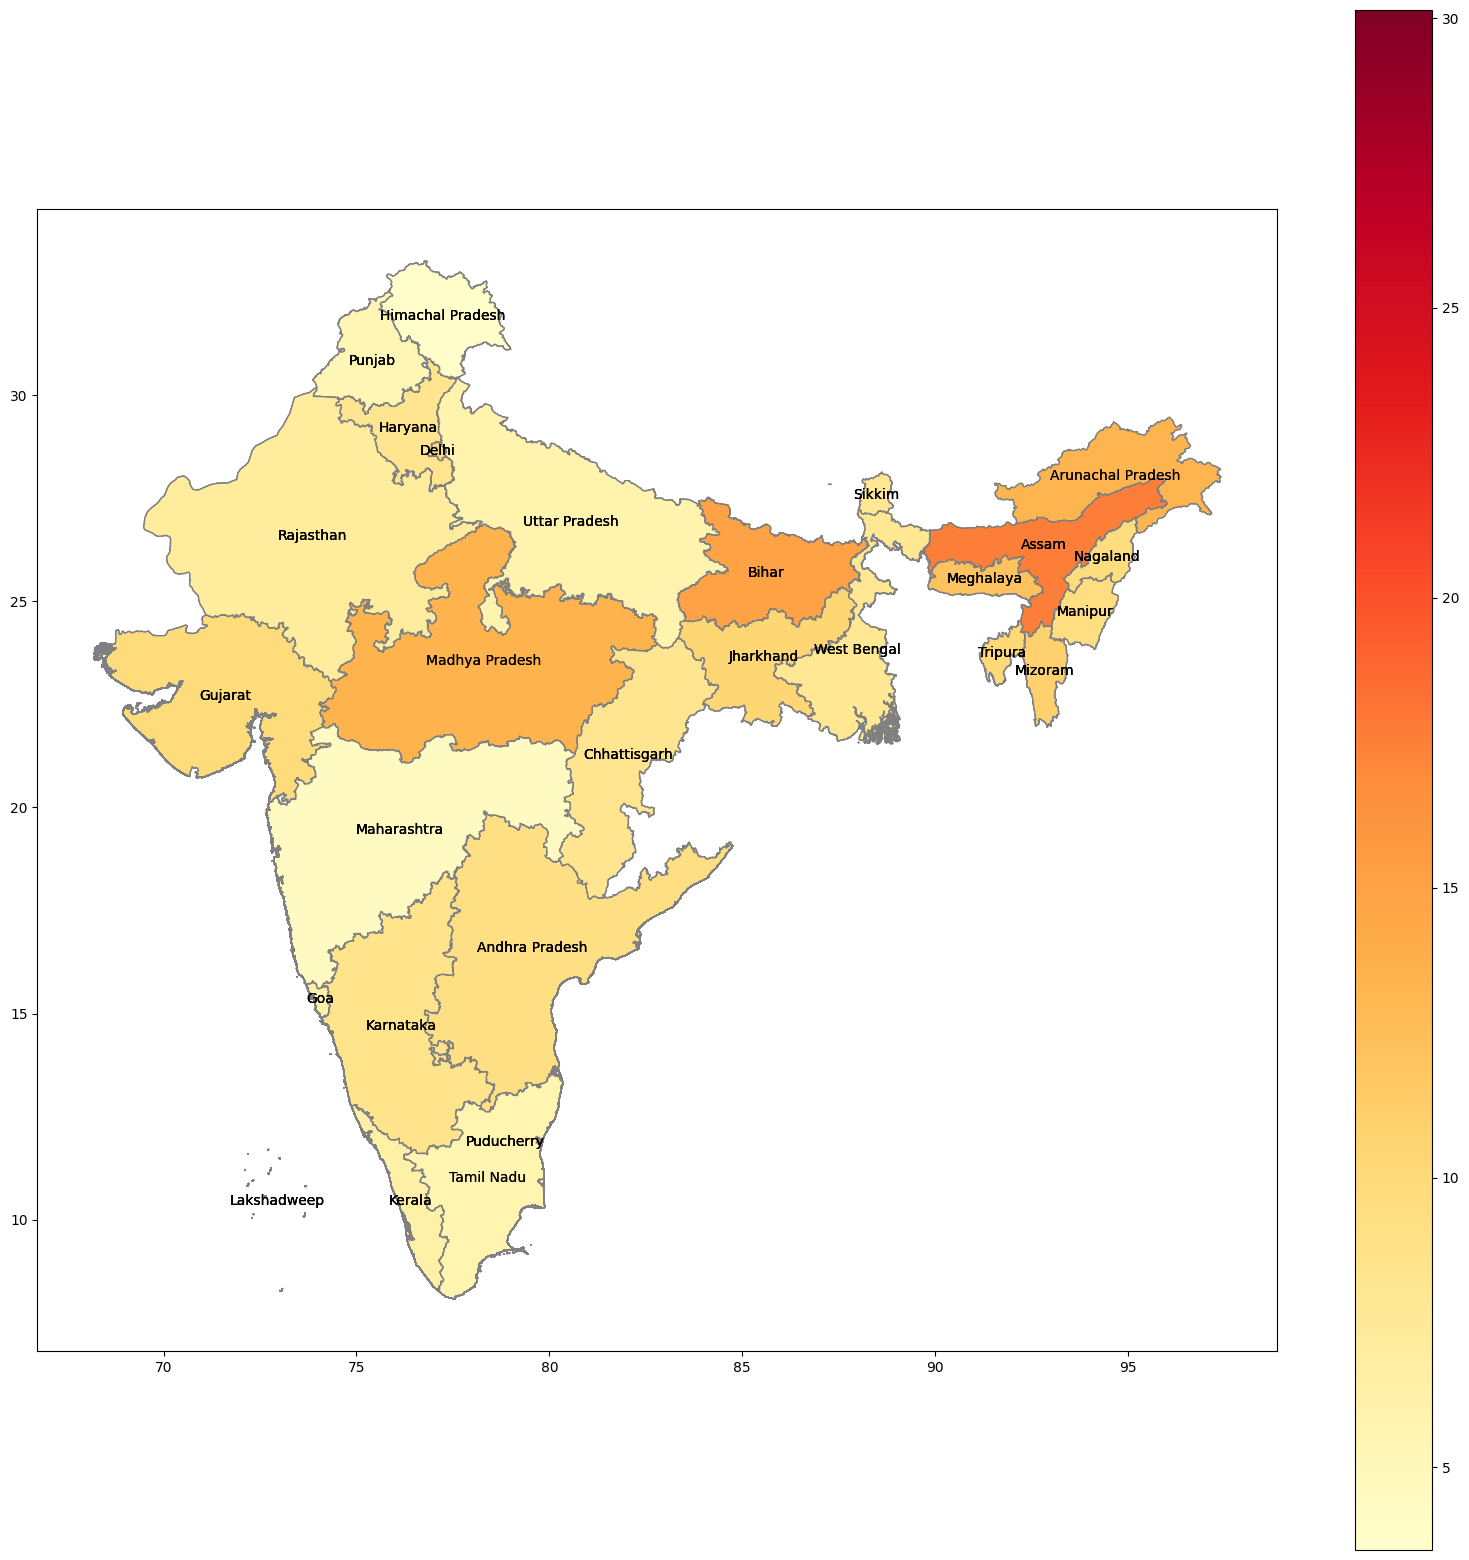

In [26]:

fig, ax = plt.subplots(1, 1, figsize=(20, 20))  # Increase the figsize to increase the size of the map
merged.plot(column='Average', cmap='YlOrRd', linewidth=1, ax=ax, edgecolor='0.5', legend=True)

# Annotate each state with its name at the center
for idx, row in merged.iterrows():
    centroid_x, centroid_y = row['geometry'].centroid.x, row['geometry'].centroid.y
    state_name = row['NAME_1']
    ax.text(centroid_x, centroid_y, state_name, fontsize=10, ha='center', va='center')


ENROLLMENT ANALYSIS AND VISUALISATION

In [27]:
df_enroll = pd.read_csv('gross-enrollment-ratio-2013-2016.csv')
df_enroll.sort_values(by='Year',inplace=True)

In [28]:
df_enroll['State_UT'].replace({
    'MADHYA PRADESH':'Madhya Pradesh',
    'Pondicherry':'Puducherry',
    'Uttaranchal':'Uttar Pradesh'
},inplace=True)

In [29]:
filt1 = (df_enroll['State_UT'] =='All India')

In [30]:
filt1.head()    

0     False
20    False
21    False
22    False
23    False
Name: State_UT, dtype: bool

In [31]:
df_gre_total = df_enroll.loc[filt1]
boys_col = ['Primary_Boys','Upper_Primary_Boys','Secondary_Boys','Higher_Secondary_Boys']
girls_col = ['Primary_Girls','Upper_Primary_Girls','Secondary_Girls','Higher_Secondary_Girls']

In [32]:
df_gre_total.loc[:,'Higher_Secondary_Boys']=df_gre_total.loc[:,'Higher_Secondary_Boys'].astype('float')
df_gre_total.loc[:,'Higher_Secondary_Girls']=df_gre_total.loc[:,'Higher_Secondary_Girls'].astype('float')

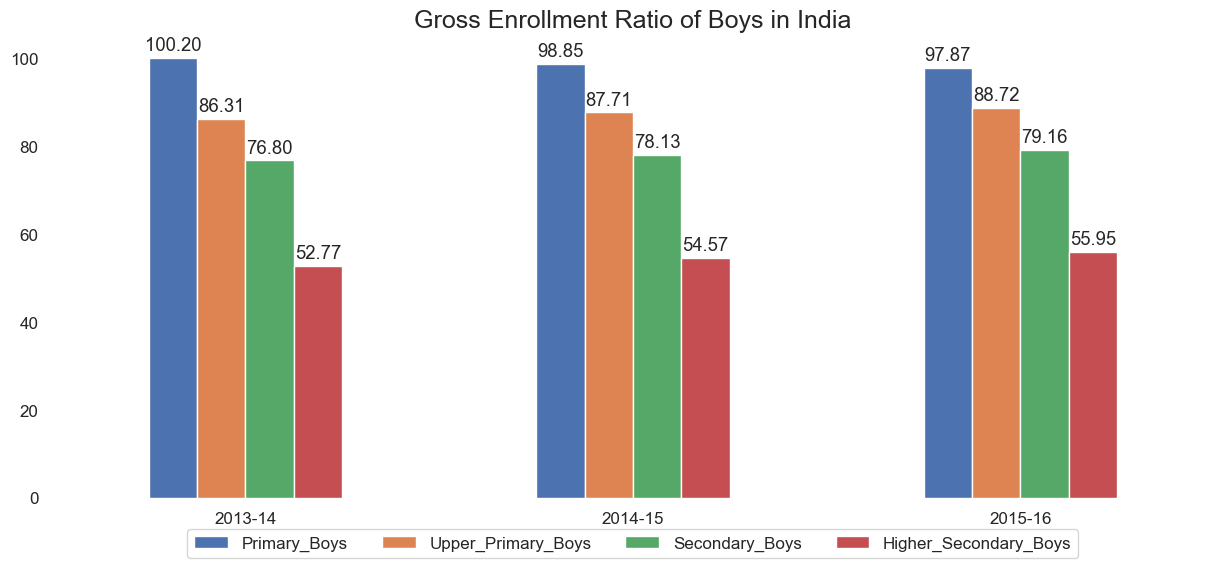

In [33]:
sns.set(font_scale = 1.11)
sns.set_style("white")
ax = df_gre_total[boys_col].plot.bar(figsize=(15,6))
sns.despine(left=True, bottom=True)

ax.set_xticklabels(np.arange(3))
ax.set_title('Gross Enrollment Ratio of Boys in India',size=18)
ax.set_xticklabels(list(df_gre_total['Year']))
for tick in ax.get_xticklabels():
    tick.set_rotation(-0)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),ncol=4)

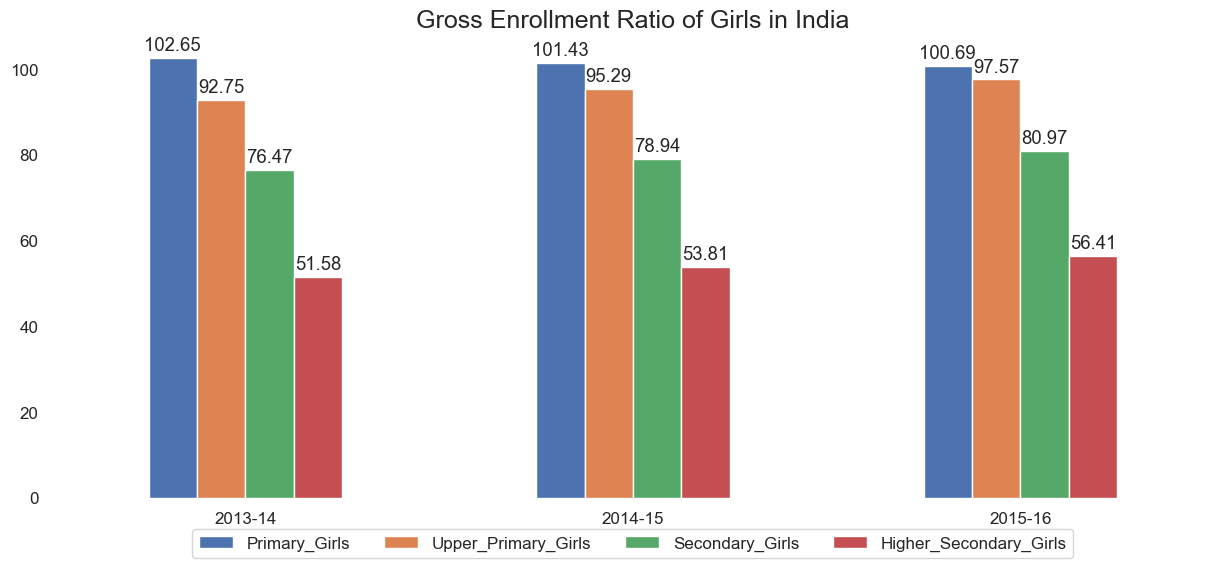

In [34]:
sns.set(font_scale = 1.11)
sns.set_style("white")
ax = df_gre_total[girls_col].plot.bar(figsize=(15,6))
sns.despine(left=True, bottom=True)

ax.set_xticklabels(np.arange(3))
ax.set_title('Gross Enrollment Ratio of Girls in India',size=18)
ax.set_xticklabels(list(df_gre_total['Year']))
for tick in ax.get_xticklabels():
    tick.set_rotation(-0)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),ncol=4)

In [35]:
filt_year = df_enroll['Year'] =='2015-16'
df_enroll_latest = df_enroll[filt_year]
df_enroll_latest.sort_values(by='Higher_Secondary_Total',ascending=False,inplace=True)
df_enroll_latest['Higher_Secondary_Total'] = df_enroll_latest['Higher_Secondary_Total'].astype('float')

C:\Users\pc\AppData\Local\Temp\ipykernel_6428\3829983512.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_enroll_latest.sort_values(by='Higher_Secondary_Total',ascending=False,inplace=True)
C:\Users\pc\AppData\Local\Temp\ipykernel_6428\3829983512.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_enroll_latest['Higher_Secondary_Total'] = df_enroll_latest['Higher_Secondary_Total'].astype('float')


C:\Users\pc\AppData\Local\Temp\ipykernel_6428\1263685416.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="State_UT", y="Primary_Total",palette='Purples_r',


Text(0.5, 0.98, 'Sates with highest GER in Primary')

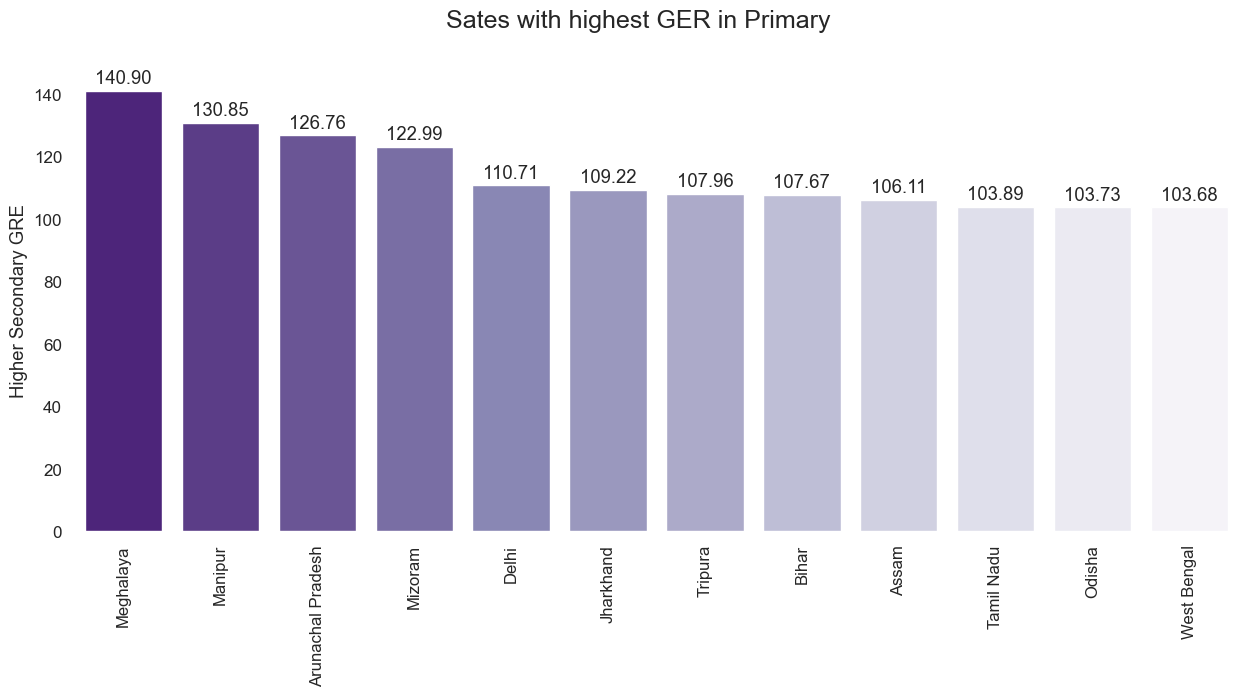

In [36]:
fig,ax = plt.subplots(figsize=(15,6))
sns.set_style("white")
ax = sns.barplot(x="State_UT", y="Primary_Total",palette='Purples_r',
                 data=df_enroll_latest.sort_values(by='Primary_Total',ascending=False).head(12))
sns.despine(left=True, bottom=True)


for item in ax.get_xticklabels():
    item.set_rotation(90)
    item.set_fontsize(12)
ax.set_xlabel('')
ax.set_ylabel('Higher Secondary GRE')


for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')


fig.suptitle('Sates with highest GER in Primary', fontsize=18)

Plots of all states in detail

In [37]:
def plot_state(state):    
    filt_state = (df_enroll['State_UT'] == state)
    df_gre_total = df_enroll.loc[filt_state]
   
    df_gre_total.loc[:,'Higher_Secondary_Boys']=df_gre_total.loc[:,'Higher_Secondary_Boys'].astype('float')
    df_gre_total.loc[:,'Higher_Secondary_Girls']=df_gre_total.loc[:,'Higher_Secondary_Girls'].astype('float')
    sns.set(font_scale = 1.111)
   
    
    sns.set_style("white")
    fig= plt.figure(figsize=(18,12))
    
    
    ax1 = fig.add_subplot(211)
   
    ax2 = fig.add_subplot(212)
    df_gre_total[boys_col].plot.bar(ax=ax1)
    df_gre_total[girls_col].plot.bar(ax=ax2)
    sns.despine(left=True, bottom=True)
    
    
    ax1.set_xticklabels(np.arange(3))
    ax1.set_title('Gross Enrolment Ratio of Boys',size=15)
    ax1.set_xticklabels(list(df_gre_total['Year']))
    for tick in ax1.get_xticklabels():
        tick.set_rotation(-0)
    fig.suptitle(f'{state}', fontsize=18)
    
    ax2.set_xticklabels(np.arange(3))
    ax2.set_title('Gross Enrolment Ratio of Girls',size=15)
    ax2.set_xticklabels(list(df_gre_total['Year']))
    for tick in ax2.get_xticklabels():
        tick.set_rotation(-0)

    for p in ax1.patches:
        ax1.annotate(format(p.get_height(), '.2f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 9), 
                       textcoords = 'offset points')
    
    for p in ax2.patches:
        ax2.annotate(format(p.get_height(), '.2f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 9), 
                       textcoords = 'offset points')
        
        
    ax1.get_legend().remove()
    
    import matplotlib.patches as mpatches
    
    primary_patch = mpatches.Patch(color='#29629e', label='Primary')
    upper_primary_patch = mpatches.Patch(color='#ff6d05', label='Upper Primary')
    secondary_patch = mpatches.Patch(color='#226908', label='Secondary')
    higher_secondary_patch = mpatches.Patch(color='#8a1111', label='Higher Secondary')    
    ax2.legend(handles=[primary_patch, upper_primary_patch,secondary_patch,higher_secondary_patch],
               loc='upper center', bbox_to_anchor=(0.5, -0.05),ncol=4)

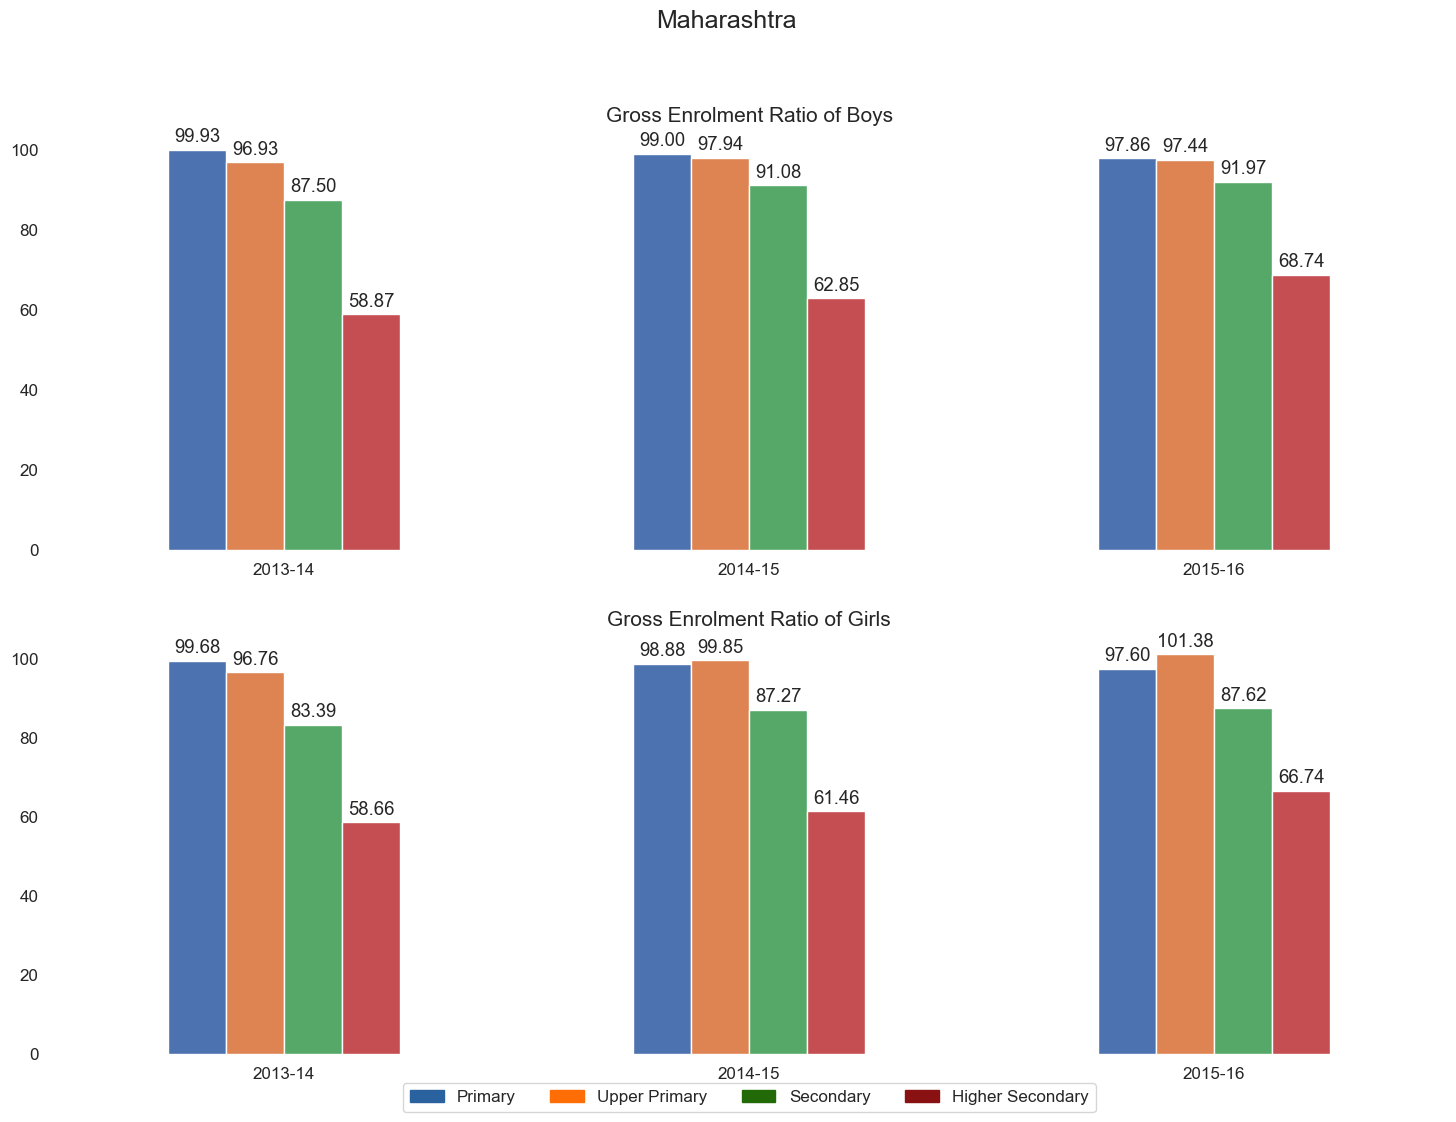

In [38]:
plot_state('Maharashtra')

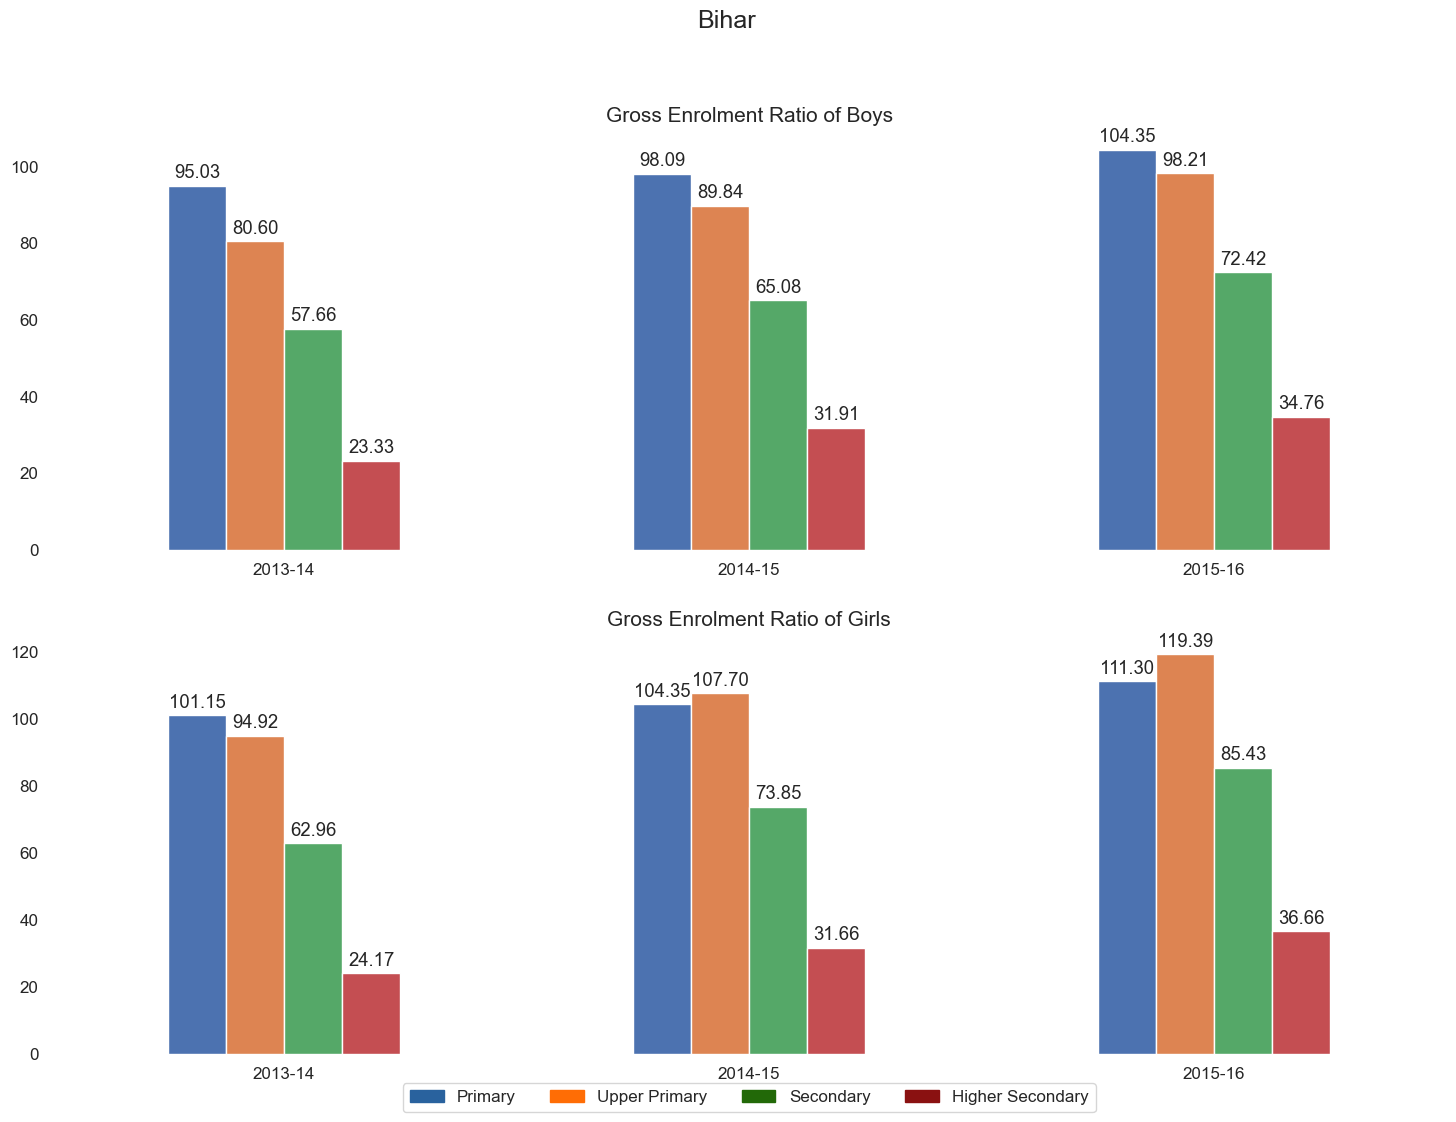

In [39]:
plot_state('Bihar')

Visualizing the data in a map

In [40]:
india.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,NL_NAME_1,VARNAME_1,TYPE_1,ENGTYPE_1,filename,filename_1,filename_2,filename_3,filename_4,geometry
0,105,IND,India,1,Andaman and Nicobar,,Andaman & Nicobar Islands|Andaman et Nicobar|I...,Union Territor,Union Territory,,,,,,"MULTIPOLYGON (((93.78773 6.85264, 93.78849 6.8..."
1,105,IND,India,2,Andhra Pradesh,,,State,State,,,,,,"MULTIPOLYGON (((80.27458 13.45958, 80.27458 13..."
2,105,IND,India,3,Arunachal Pradesh,,Agence de la Frontire du Nord-Est(French-obsol...,State,State,,,,,,"POLYGON ((96.15778 29.38310, 96.16380 29.37668..."
3,105,IND,India,4,Assam,,,State,State,,,,,,"MULTIPOLYGON (((89.87145 25.53730, 89.87118 25..."
4,105,IND,India,5,Bihar,,,State,State,,,,,,"MULTIPOLYGON (((88.10548 26.53904, 88.10505 26..."


In [41]:
india['NAME_1'].replace({
    'Andaman & Nicobar Island':'Andaman & Nicobar Islands',
    'Arunanchal Pradesh':'Arunachal Pradesh',
    'NCT of Delhi':'Delhi',
    'Jammu & Kashmir':'Jammu And Kashmir',
    'Dadara & Nagar Havelli':'Dadra & Nagar Haveli'    
},inplace=True)

df_enroll.rename(columns={
    'State_UT':'state'
},inplace=True)

india.rename(columns={
    'NAME_1':'state'
},inplace=True)

In [42]:
latest_filt = df_enroll['Year'] =='2015-16'
states_op = india.merge(df_enroll.loc[latest_filt][1:].sort_values(by='state'),on='state')

In [43]:
cols=['Primary_Boys','Primary_Girls','Primary_Total','Upper_Primary_Boys',
      'Upper_Primary_Girls','Upper_Primary_Total','Secondary_Boys','Secondary_Girls',
      'Secondary_Total','Higher_Secondary_Boys','Higher_Secondary_Girls','Higher_Secondary_Total']
states_op[cols] = states_op[cols].astype('float')

Plotting the data by gender

In [44]:
import seaborn as sns

Text(0.5, 0.98, 'Distribution of Gross Enrolment Ratio of boys across India')

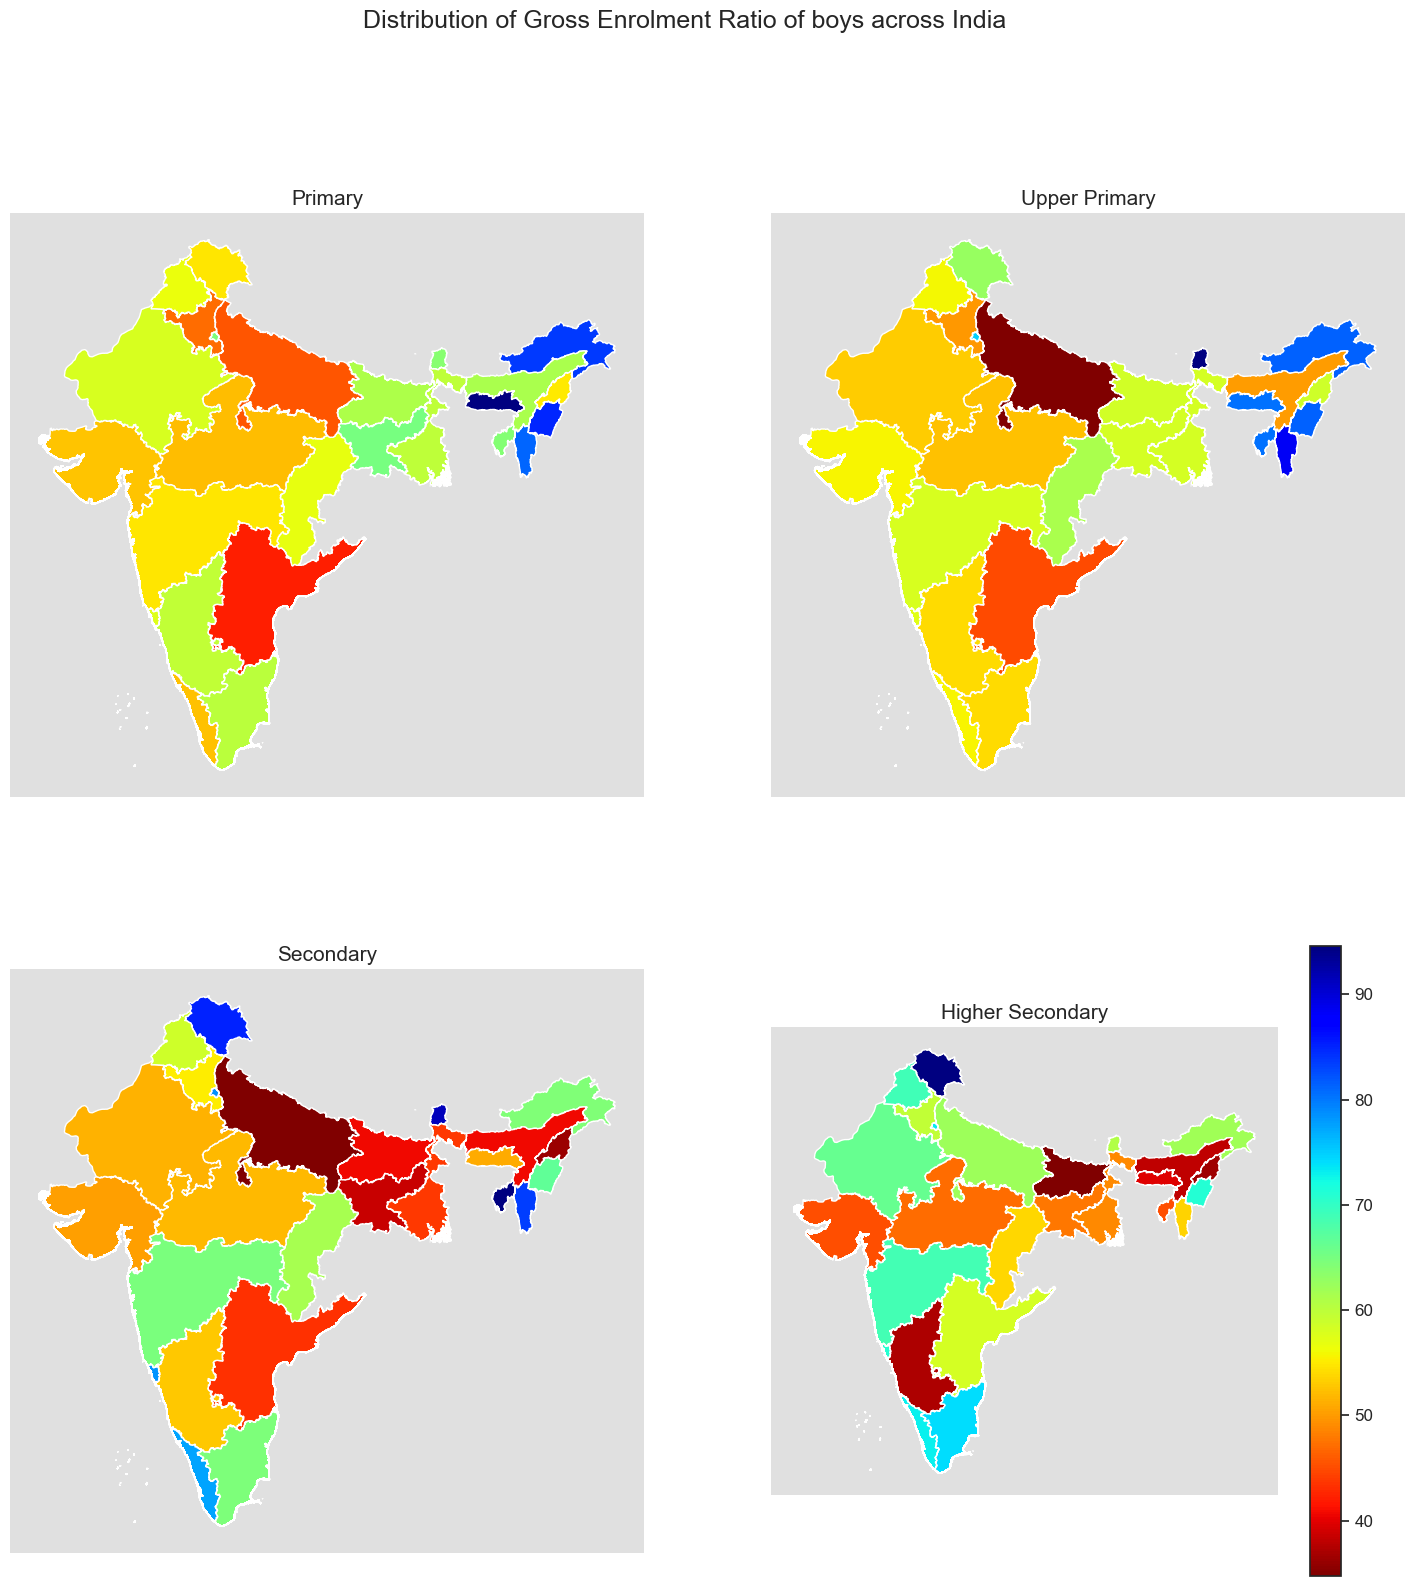

In [45]:
fig,ax = plt.subplots(2,2,figsize=(18,18))
sns.set_style('white')
states_op.plot(column='Primary_Boys',cmap='jet_r',figsize=(9,9),
                    legend=False,ax=ax[0,0])
ax[0,0].set_title('Primary',fontsize=15)
states_op.plot(column='Upper_Primary_Boys',cmap='jet_r',figsize=(9,9),
                    legend=False,ax=ax[0,1])
ax[0,1].set_title('Upper Primary',fontsize=15)
states_op.plot(column='Secondary_Boys',cmap='jet_r',figsize=(9,9),
                    legend=False,ax=ax[1,0])
ax[1,0].set_title('Secondary',fontsize=15)
states_op.plot(column='Higher_Secondary_Boys',cmap='jet_r',figsize=(9,9),
                    legend=True,ax=ax[1,1])
ax[1,1].set_title('Higher Secondary',fontsize=15)

ax[0,0].set_facecolor('#e0e0e0')
ax[0,1].set_facecolor('#e0e0e0')
ax[1,0].set_facecolor('#e0e0e0')
ax[1,1].set_facecolor('#e0e0e0')

for i in np.arange(2):
    for j in np.arange(2):
        ax[i,j].spines['top'].set_visible(False)
        ax[i,j].spines['right'].set_visible(False)
        ax[i,j].spines['left'].set_visible(False)
        ax[i,j].spines['bottom'].set_visible(False)
        for item in ax[i,j].get_xticklabels():
            item.set_visible(False)
        for item in ax[i,j].get_yticklabels():
            item.set_visible(False) 
        ax[i,j].set_xticks([]) 
        ax[i,j].set_yticks([]) 
fig.suptitle('Distribution of Gross Enrolment Ratio of boys across India', fontsize=18)



Text(0.5, 0.98, 'Distribution of Gross Enrolment Ratio of girls across India')

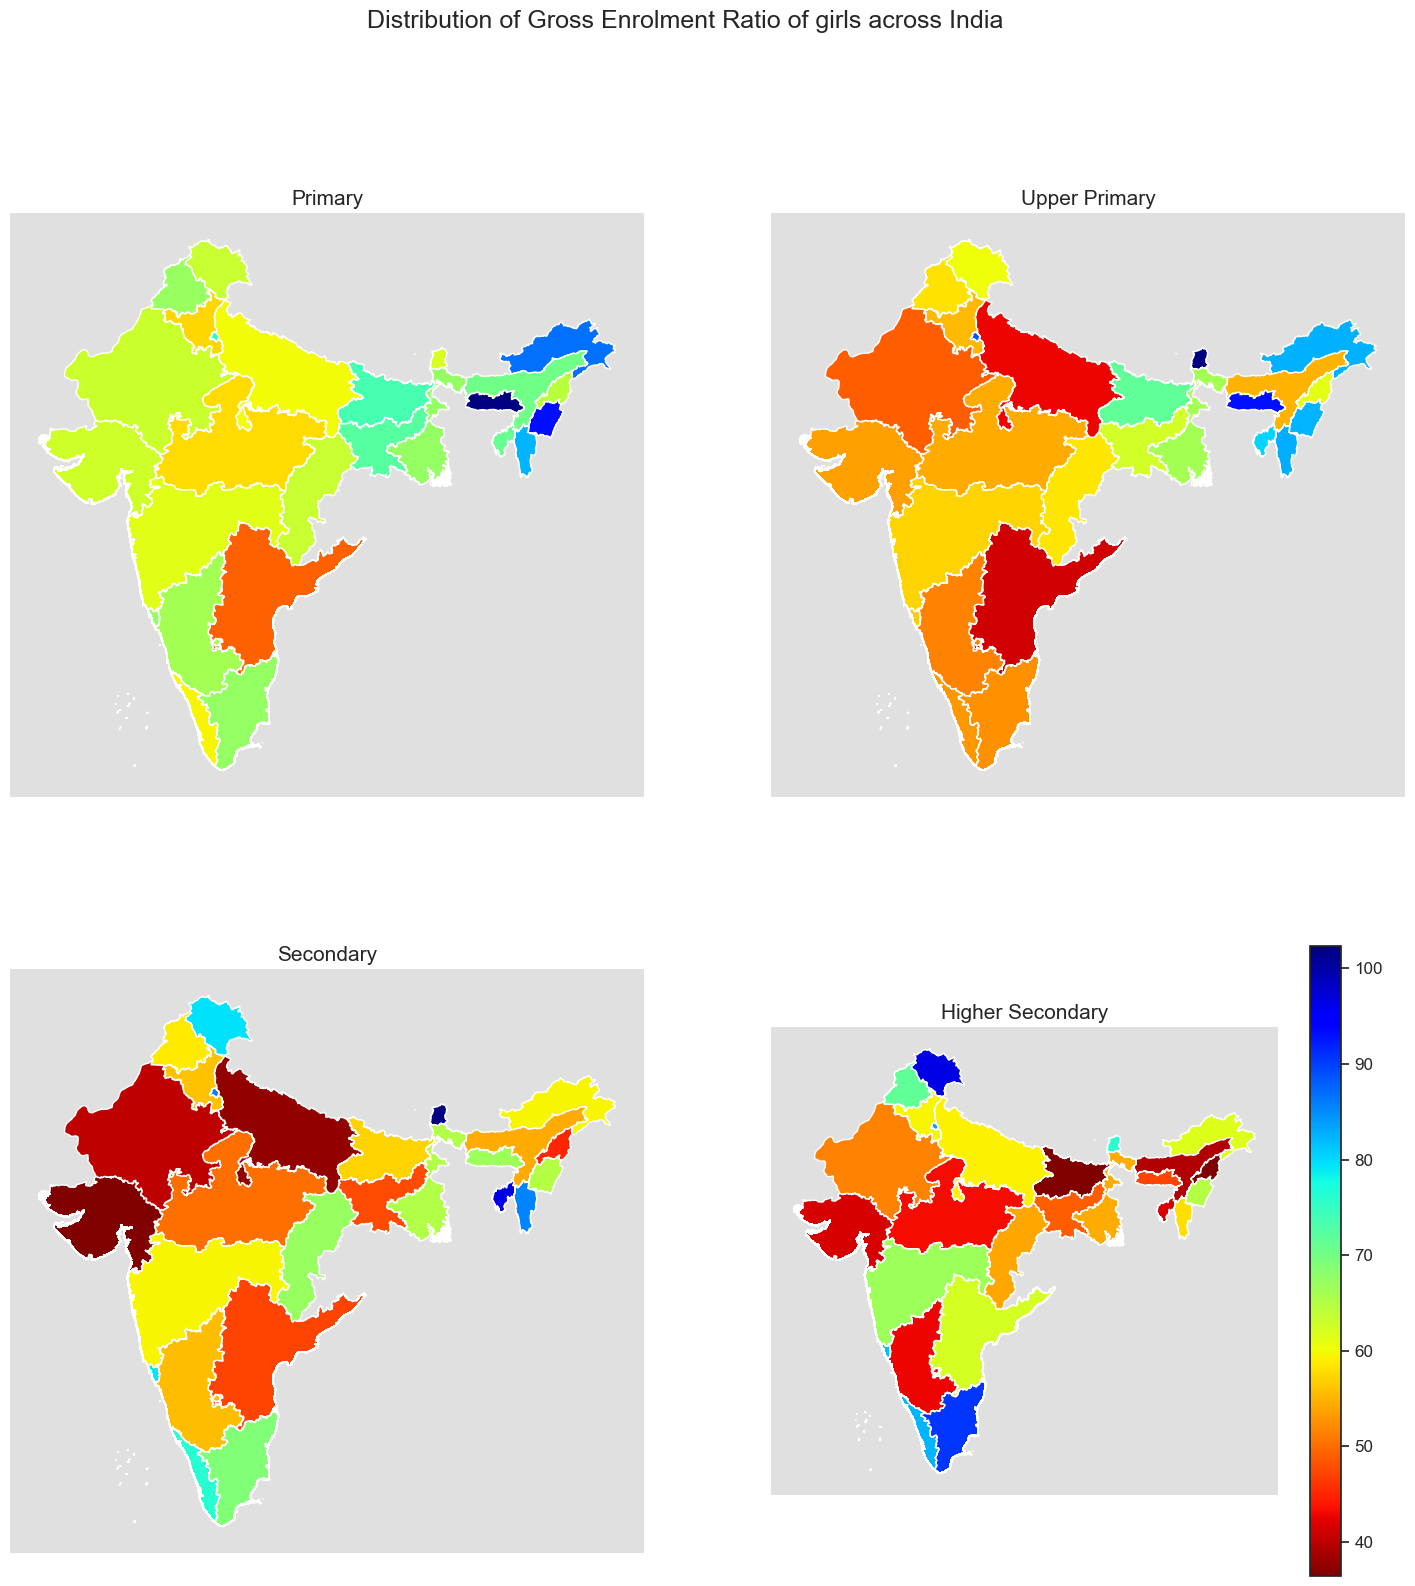

In [46]:
fig,ax = plt.subplots(2,2,figsize=(18,18))
sns.set_style('white')
states_op.plot(column='Primary_Girls',cmap='jet_r',figsize=(9,9),
                    legend=False,ax=ax[0,0])
ax[0,0].set_title('Primary',fontsize=15)
states_op.plot(column='Upper_Primary_Girls',cmap='jet_r',figsize=(9,9),
                    legend=False,ax=ax[0,1])
ax[0,1].set_title('Upper Primary',fontsize=15)
states_op.plot(column='Secondary_Girls',cmap='jet_r',figsize=(9,9),
                    legend=False,ax=ax[1,0])
ax[1,0].set_title('Secondary',fontsize=15)
states_op.plot(column='Higher_Secondary_Girls',cmap='jet_r',figsize=(9,9),
                    legend=True,ax=ax[1,1])
ax[1,1].set_title('Higher Secondary',fontsize=15)

ax[0,0].set_facecolor('#e0e0e0')
ax[0,1].set_facecolor('#e0e0e0')
ax[1,0].set_facecolor('#e0e0e0')
ax[1,1].set_facecolor('#e0e0e0')

for i in np.arange(2):
    for j in np.arange(2):
        ax[i,j].spines['top'].set_visible(False)
        ax[i,j].spines['right'].set_visible(False)
        ax[i,j].spines['left'].set_visible(False)
        ax[i,j].spines['bottom'].set_visible(False)
        for item in ax[i,j].get_xticklabels():
            item.set_visible(False)
        for item in ax[i,j].get_yticklabels():
            item.set_visible(False) 
        ax[i,j].set_xticks([]) 
        ax[i,j].set_yticks([]) 
fig.suptitle('Distribution of Gross Enrolment Ratio of girls across India', fontsize=18)